# Custom object detection using YOLO-V3 for 2 classes ( man and cycle):

# Training YOLOv3 using Darknet on Colab notebook 

This Colab notebook will enable you to train a **Yolo v3** model using **Darknet** with the Colab **12GB-RAM GPU**.

This was built based on:
* YOLO's original author's web site (https://pjreddie.com/darknet/yolo/)
* AlexeyAB darknet repo (https://github.com/AlexeyAB/darknet/)
* Ivan Goncharov [notebook](https://github.com/ivangrov/YOLOv3-GoogleColab/blob/master/YOLOv3_GoogleColab.ipynb) and  David Ibanez [notebook](https://github.com/kriyeng/yolo-on-colab-notebook/blob/master/Tutorial_DarknetToColab.ipynb)





### The steps followed are [1]:

* Setting up of Google Drive.
* Addition of some utils to help perform some tasks.
* Configuration of the pre-requisites -
  * Checking the CUDA installation on the runtime.
  * Installing cuDNN.
  * Cloning and compiling Darknet.
   This uses a repo based on [AlexeyAB's Darknet repo](https://github.com/AlexeyAB/darknet/) with some additional changes to make it possible to load files from `/My Drive/` and reduced the number of logs on console to speed up the notebook as modified by David Ibanez. [1]
  
  Reference:
  [1] David Ibanez [notebook](https://github.com/kriyeng/yolo-on-colab-notebook/blob/master/Tutorial_DarknetToColab.ipynb)



## STEP 0. Configure runtime to work with GPU

We will use the **12GB-RAM GPU** hardware acceleration!

Set this up as follows:
Go to **> Menu > Runtime > Configure Runtime Type** And select **GPU** From the **Hardware accelerator** drop down meu

## STEP 1. Link your local files to Google Drive
Ensure you have installed Google Backup and Sync to keep folder of your Drive synced with a folder on your computer.

![schema drive.jpg](http://blog.ibanyez.info/download/B20190408T000000060.jpg)

 Create a folder on your Google Drive named _**Dark**_. 








1.	Create the following folders in Dark –
*	backup (the weights generated during training will get updated here),
*	cuDNN and
*	bin
2.	Download the following folders from my git repository and place it in Dark : 
*	img 
*	obj.data
*	obj.names
* obj.txt
*	test.txt
*	train.txt
*	yolov3.cfg

3. Download https://pjreddie.com/media/files/darknet53.conv.74
 to start training the model initially. It is initial weights for training custom data used as pre-trained feature extractor (backbone) for YOLOv3.
Place this weight file in Dark. 


## STEP 2. Connect the Colab notebook to Google Drive

This step maps Google Drive folder with this notebook. It requires manual interaction for authorization.



In [ ]:
# the path "/content/gdrive/My Drive/" can be used to access files from the Drive now on.

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
# This is an optional cell to list the contents of the folder Dark 
!ls -la "/content/gdrive/My Drive/Dark"

total 158721
drwx------ 2 root root      4096 Jul  7 08:08 backup
drwx------ 2 root root      4096 Jul  7 08:08 bin
drwx------ 2 root root      4096 Jul  7 08:08 cfg
drwx------ 2 root root      4096 Jun 30 09:31 check
drwx------ 2 root root      4096 Jul  7 08:08 cuDNN
-rw------- 1 root root      9555 Jul 16 07:16 cycle.jpg
-rw------- 1 root root 162482580 Jun 30 09:43 darknet53.conv.74
drwx------ 2 root root      4096 Jul  7 08:10 img
-rw------- 1 root root       206 Jul  7 08:23 ob.data
-rw------- 1 root root       206 Jul  7 08:23 obj.data
-rw------- 1 root root        10 Jul  7 08:23 obj.names
-rw------- 1 root root       206 Jul  7 08:23 obj.txt
-rw------- 1 root root      1168 Jul  7 08:19 test.txt
-rw------- 1 root root      1170 Jul  7 08:19 train.txt
-rw------- 1 root root      1168 Jul 14 03:59 valid.txt
drwx------ 2 root root      4096 Jul  7 08:08 weights
-rw------- 1 root root      2437 Jul 14 04:25 yolov3.cfg


In [ ]:
!sudo apt-get install tree

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 40.7 kB of archives.
After this operation, 105 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tree amd64 1.7.0-5 [40.7 kB]
Fetched 40.7 kB in 1s (39.9 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure:

In [ ]:
!tree /content/gdrive/My\ Drive/Dark/

/content/gdrive/My Drive/Dark/
├── backup
│   ├── yolov3_1000.weights
│   └── yolov3_last.weights
├── bin
│   └── darknet
│       └── darknet
├── cfg
│   └── yolov3.cfg
├── check
├── cuDNN
│   └── cudnn-10.0-linux-x64-v7.5.0.56.solitairetheme8
├── cycle.jpg
├── darknet53.conv.74
├── img
│   ├── frame10.jpg
│   ├── frame10.txt
│   ├── frame11.jpg
│   ├── frame11.txt
│   ├── frame12.jpg
│   ├── frame12.txt
│   ├── frame13.jpg
│   ├── frame13.txt
│   ├── frame14.jpg
│   ├── frame14.txt
│   ├── frame15.jpg
│   ├── frame15.txt
│   ├── frame16.jpg
│   ├── frame16.txt
│   ├── frame17.jpg
│   ├── frame17.txt
│   ├── frame18.jpg
│   ├── frame18.txt
│   ├── frame19.jpg
│   ├── frame19.txt
│   ├── frame1.jpg
│   ├── frame1.txt
│   ├── frame20.jpg
│   ├── frame20.txt
│   ├── frame21.jpg
│   ├── frame21.txt
│   ├── frame22.jpg
│   ├── frame22.txt
│   ├── frame23.jpg
│   ├── frame23.txt
│   ├── frame24.jpg
│   ├── frame24.txt
│   ├── frame25.jpg
│   ├── frame25.txt
│   ├── frame2.jpg
│   ├── frame2.

## STEP 3. Check CUDA release version

Nvidia CUDA is pre-installed on Colab notebooks. 



In [ ]:
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


## STEP 4. Install cuDNN according to the current CUDA version


* Download cuDNN from [Nvidia website](https://developer.nvidia.com/cudnn) 

  * Currently we have _**CUDA 10.0**_ preinstalled in Colab runtime, so download [cuDNN v7.5.0.56 for CUDA v10.0](https://developer.nvidia.com/compute/machine-learning/cudnn/secure/v7.5.0.56/prod/10.0_20190219/cudnn-10.0-linux-x64-v7.5.0.56.tgz) - the file is cudnn-10.0-linux-x64-v7.5.0.56.tgz

*  Copy the _**tgz**_ file to the Dark folder under cuDNN . 



In [ ]:
!tar -xzvf gdrive/My\ Drive/Dark/cuDNN/cudnn-10.0-linux-x64-v7.5.0.56.solitairetheme8 -C /usr/local/
!chmod a+r /usr/local/cuda/include/cudnn.h

!cat /usr/local/cuda/include/cudnn.h | grep CUDNN_MAJOR -A 2

cuda/include/cudnn.h
cuda/NVIDIA_SLA_cuDNN_Support.txt
cuda/lib64/libcudnn.so
cuda/lib64/libcudnn.so.7
cuda/lib64/libcudnn.so.7.5.0
cuda/lib64/libcudnn_static.a
#define CUDNN_MAJOR 7
#define CUDNN_MINOR 5
#define CUDNN_PATCHLEVEL 0
--
#define CUDNN_VERSION (CUDNN_MAJOR * 1000 + CUDNN_MINOR * 100 + CUDNN_PATCHLEVEL)

#include "driver_types.h"


## STEP 5. Cloning and compiling Darknet:
In this step we'll clone the darkent repo and compile it. 
* Clone Repo
* Compile Darknet

When compiling ends, your output last line has to be something like this:

_`g++ -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv` -DGPU (...)_`

In [ ]:
# Leave this code uncommented on the very first run of your notebook or if you ever need to recompile darknet again.
# Comment this code on the future runs.
!git clone https://github.com/kriyeng/darknet/
%cd darknet

# Check the folder
!ls

# Branch of David Ibanez
!git checkout feature/google-colab

#Compile Darknet
!make

#Copies the Darknet compiled version to Google drive
!cp ./darknet /content/gdrive/My\ Drive/Dark/bin/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 10068, done.
remote: Total 10068 (delta 0), reused 0 (delta 0), pack-reused 10068
Receiving objects: 100% (10068/10068), 10.15 MiB | 5.85 MiB/s, done.
Resolving deltas: 100% (6732/6732), done.
/content/darknet
3rdparty      CMakeLists.txt	      image_yolov3.sh	     scripts
appveyor.yml  CMakeSettings.json      include		     src
build	      DarknetConfig.cmake.in  json_mjpeg_streams.sh  video_v2.sh
build.ps1     darknet.py	      LICENSE		     video_yolov3.sh
build.sh      darknet_video.py	      Makefile
cfg	      data		      net_cam_v3.sh
cmake	      image_yolov2.sh	      README.md
Branch 'feature/google-colab' set up to track remote branch 'feature/google-colab' from 'origin'.
Switched to a new branch 'feature/google-colab'
mkdir -p obj
mkdir -p backup
mkdir -p results
chmod +x *.sh
g++ -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -W

## STEP 6. Runtime configuration finished!







#  Training YOLOv3

 



In [ ]:
# don't go beyond here with Run All

 ##  Preparing your data and configuration files 

Let's take a look at what configuration files you need to have in your local drive _`Dark`_

![Yolov3 configuration files cheat sheet.jpg](http://blog.ibanyez.info/download/B20190410T000000072.png)

You can download the cheat sheet [here](http://blog.ibanyez.info/download/B20190410T000000072.png)





## Loading files to VM local drive
The network speed between Google Drive and Colab VM can have an impact on your training speed accessing to your dataset images.





####  Copying files from Google Drive:
Execute the following cell to copy your files

In [ ]:
# Copy files from Google Drive 
!cp -r "/content/gdrive/My Drive/Dark/img" ./img


## Finally, Train your model!

When you execute the following command, your model will start training.

You will have a log line per epoch. On each iteration you will see how your training is going.

> **TRICK: Darknet copies a backup of your trained weights every 100 iterations. This file will be synced to your local drive on your computer, as well as the backups darknet do every 1000 iterations, saving it on a separate file.**





In [ ]:
#!./darknet detector train "/content/gdrive/My Drive/Dark/obj.data" "/content/gdrive/My Drive/Dark/yolov3.cfg" "/content/gdrive/My Drive/Dark/weights/darknet53.conv.74" -dont_show  

In [ ]:
#download files
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()
  
  
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)
def download(path):
  from google.colab import files
  files.download(path)

layer     filters    size              input                output
   0 conv     16  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  16 0.319 BF
   1 max          2 x 2 / 2   608 x 608 x  16   ->   304 x 304 x  16 0.006 BF
   2 conv     32  3 x 3 / 1   304 x 304 x  16   ->   304 x 304 x  32 0.852 BF
   3 max          2 x 2 / 2   304 x 304 x  32   ->   152 x 152 x  32 0.003 BF
   4 conv     64  3 x 3 / 1   152 x 152 x  32   ->   152 x 152 x  64 0.852 BF
   5 max          2 x 2 / 2   152 x 152 x  64   ->    76 x  76 x  64 0.001 BF
   6 conv    128  3 x 3 / 1    76 x  76 x  64   ->    76 x  76 x 128 0.852 BF
   7 max          2 x 2 / 2    76 x  76 x 128   ->    38 x  38 x 128 0.001 BF
   8 conv    256  3 x 3 / 1    38 x  38 x 128   ->    38 x  38 x 256 0.852 BF
   9 max          2 x 2 / 2    38 x  38 x 256   ->    19 x  19 x 256 0.000 BF
  10 conv    512  3 x 3 / 1    19 x  19 x 256   ->    19 x  19 x 512 0.852 BF
  11 max          2 x 2 / 1    19 x  19 x 512   ->    19 x  19 x 512 0.001 

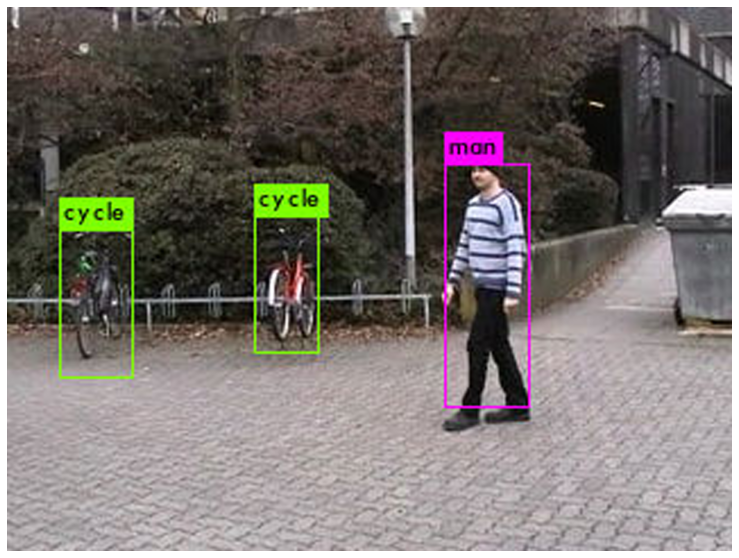

In [ ]:
# run your custom detector with this command 
!./darknet detector test "/content/gdrive/My Drive/Dark/obj.data" "/content/gdrive/My Drive/Dark/yolov3.cfg" "/content/gdrive/My Drive/Dark/backup/yolov3_last.weights" "/content/gdrive/My Drive/Dark/img/frame1.jpg" 
imShow('predictions.jpg')

In [ ]:
# LOCAL MACHINE DOWNLOAD
# if you get an error first run then run it again and it should work
download('predictions.jpg')

## Continue training:

  
* **To Re-run your training after reaching the limitation time for Colab runtimes (12 hours):** 
  * Reconnect the current one.
  * Comment the cell above for training and uncomment the cell below.


In [ ]:
# Start training at the point where the last runtime finished
!./darknet detector train "/content/gdrive/My Drive/Dark/obj.data" "/content/gdrive/My Drive/Dark/yolov3.cfg" "/content/gdrive/My Drive/Dark/backup/yolov3_last.weights" -dont_show -map

valid: Using default '/content/gdrive/My Drive/Dark/train.txt'
 Prepare additional network for mAP calculation...
layer     filters    size              input                output
   0 conv     16  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  16 0.319 BF
   1 max          2 x 2 / 2   608 x 608 x  16   ->   304 x 304 x  16 0.006 BF
   2 conv     32  3 x 3 / 1   304 x 304 x  16   ->   304 x 304 x  32 0.852 BF
   3 max          2 x 2 / 2   304 x 304 x  32   ->   152 x 152 x  32 0.003 BF
   4 conv     64  3 x 3 / 1   152 x 152 x  32   ->   152 x 152 x  64 0.852 BF
   5 max          2 x 2 / 2   152 x 152 x  64   ->    76 x  76 x  64 0.001 BF
   6 conv    128  3 x 3 / 1    76 x  76 x  64   ->    76 x  76 x 128 0.852 BF
   7 max          2 x 2 / 2    76 x  76 x 128   ->    38 x  38 x 128 0.001 BF
   8 conv    256  3 x 3 / 1    38 x  38 x 128   ->    38 x  38 x 256 0.852 BF
   9 max          2 x 2 / 2    38 x  38 x 256   ->    19 x  19 x 256 0.000 BF
  10 conv    512  3 x 3 / 1    19 x  19

In [ ]:
imShow('chart.png')

In [ ]:
download("chart.png")

## Thank You